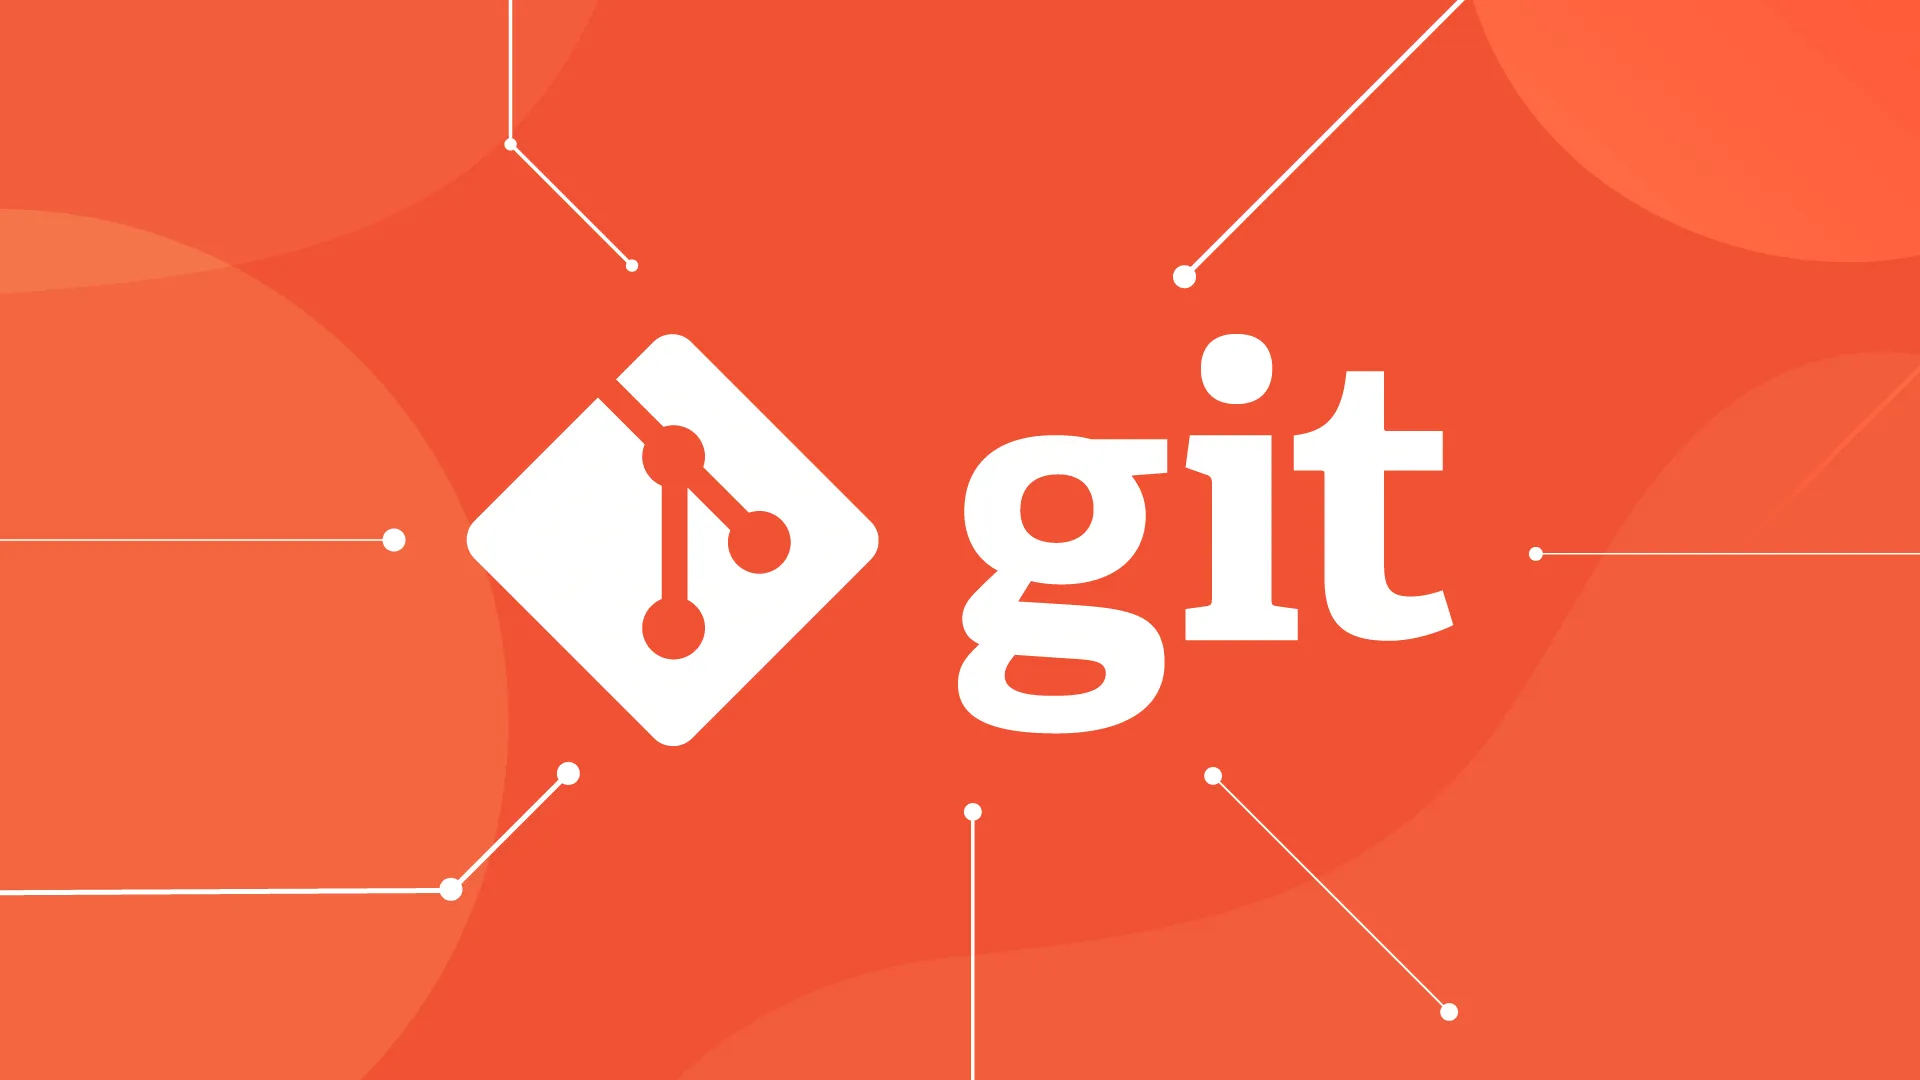

# Git

# Git Avanzado – Manejo de Conflictos, Revert, Checkout y Reset

# Ramas

# Git merge

## **Ejercicio 1: Merge sin conflictos (Fast-forward)**


1. **Crea un nuevo repositorio y una rama de desarrollo**:
   ```sh
   mkdir git-merge-ejercicio && cd git-merge-ejercicio
   git init
   ```

2.	Crea un archivo y haz un commit en main:

```bash
echo "Hola mundo" > archivo.txt
git add archivo.txt
git commit -m "Añadir archivo inicial"
```

3.	Crea una nueva rama y cambia a ella:

`git checkout -b feature`

4.	Haz cambios en la rama feature:

```bash
echo "Nueva funcionalidad" >> archivo.txt
git commit -m "Añadir nueva funcionalidad"
```

5.	Vuelve a main y fusiónala con feature:

```bash
git checkout main
git merge feature
````

`git log --oneline --graph`

## **Ejercicio 2: Merge con un commit de merge**

1.	Continúa desde el repositorio anterior.
2.	Haz un cambio en main antes de hacer merge:

```bash
echo "Otro cambio en main" >> archivo.txt
git commit -am "Actualizar archivo en main"
```

3.	Intenta hacer merge con feature:

```bash
git merge feature
````

```bash
git log --oneline --graph
```

- Git creará un commit de merge.

## **Ejercicio 3: Merge con conflictos y resolución manual**

1.	Crea una nueva rama feature-conflict y cambia a ella:

`git checkout -b feature-conflict`

2.	Modifica archivo.txt y haz un commit:

```bash
echo "Cambio desde feature-conflict" > archivo.txt
git commit -am "Cambio en feature-conflict"
```

3.	Vuelve a main y modifica archivo.txt:

```bash
git checkout main
echo "Cambio desde main" > archivo.txt
git commit -am "Cambio en main"
```

4.	Intenta hacer merge con feature-conflict:

`git merge feature-conflict`

Edita archivo.txt manualente y elige qué cambios conservar

6.	Añade y finaliza el merge:

```bash
git add archivo.txt
git commit -m "Resolver conflicto de merge"
```

`git log --oneline --graph`

## 1. Manejo de Conflictos en Git


Un conflicto ocurre cuando Git no puede fusionar cambios automáticamente porque hay modificaciones en la misma línea de un archivo en dos ramas diferentes.



```bash
mkdir test100
cd test100
git init
touch README.md
git add README.md
git commit -m "first commit"


# Editar un archivo y realizar un commit
git checkout -b nueva-rama
echo "Cambio en nueva-rama" >> archivo.txt
git add archivo.txt
git commit -m "Cambio en nueva-rama"

# Cambiar a la rama principal y editar el mismo archivo
git checkout main
echo "Cambio en main" >> archivo.txt
git add archivo.txt
git commit -m "Cambio en main"

# Intentar fusionar y observar el conflicto
git merge nueva-rama
```


### 🛠️ Resolviendo el conflicto
1. Abre `archivo.txt` y decide qué cambios mantener.
2. Edita el archivo para eliminar las marcas de conflicto `<<<<<<<`, `=======`, `>>>>>>>`.
3. Guarda los cambios y finaliza el merge:


```bash

git add archivo.txt
git commit -m "Resuelto conflicto entre main y nueva-rama"

```

```bash
# Múltiples ramas sin conflicto
# 1️⃣ Crear el repositorio y la rama principal
mkdir test-advanced
cd test-advanced
git init
touch README.md
echo "Este es el README" > README.md
git add README.md
git commit -m "First commit"

# 2️⃣ Crear una nueva rama y hacer cambios (Feature 1)
git checkout -b feature1
echo "Funcionalidad 1: Nueva función" > feature1.txt
git add feature1.txt
git commit -m "Agregar feature1.txt con nueva funcionalidad"

# 3️⃣ Volver a main y crear otra rama (Feature 2)
git checkout main
git checkout -b feature2
echo "Funcionalidad 2: Otra mejora" > feature2.txt
git add feature2.txt
git commit -m "Agregar feature2.txt con otra mejora"

# 4️⃣ Volver a main y crear un hotfix
git checkout main
git checkout -b hotfix
echo "Corrección urgente en el sistema" > hotfix.txt
git add hotfix.txt
git commit -m "Aplicar un hotfix crítico"

# 5️⃣ Volver a main y fusionar las ramas SIN conflicto
git checkout main
git merge feature1
git merge feature2 # !
git merge hotfix

# 6️⃣ Verificar el historial con gráfico
git log --oneline --graph --all
```

Cómo salir de vim

![salir de vim/nano](https://preview.redd.it/9h7ykil4t8591.jpg?auto=webp&s=465a370800c23ead5767fac9ab50a65e765b83e3)

![salir de vim](https://i.redd.it/mx7dxqljnnl81.png)

## 🔄 2. Git Revert

`git revert` se usa para deshacer un commit sin eliminar su historial.

```bash

# Crear un commit erróneo
echo "Error en código" > error.txt
git add error.txt
git commit -m "Commit con error"

# Revertir el commit
git revert HEAD
```

## 🕹️ 3. Git Checkout y Reset

`git checkout` se usa para cambiar de rama o restaurar archivos a un estado anterior.

```bash
# Cambiar de rama
git checkout main

# Restaurar un archivo a su última versión en Git
git checkout -- archivo.txt
```

`git reset` permite mover el puntero `HEAD` y modificar el historial.

```bash

# Volver a un commit anterior
git reset --hard HEAD~1

```

# 🔄 Diferencias entre `git reset --soft`, `git reset --mixed` y `git reset --hard`

| Comando | ¿Qué hace? | Impacto en área de staging (`git add`) | Impacto en archivos |
|---------|-----------|---------------------------------|----------------|
| `git reset --soft <commit>` | Mueve `HEAD` a un commit anterior, pero mantiene los cambios en staging | ✅ Se conservan | ✅ Se conservan |
| `git reset --mixed <commit>` (por defecto) | Mueve `HEAD` a un commit anterior y saca los cambios de staging | ❌ Se eliminan de staging | ✅ Se conservan en el disco |
| `git reset --hard <commit>` | Mueve `HEAD` a un commit anterior y borra **todos** los cambios | ❌ Se eliminan | ❌ Se eliminan |


### **1️⃣ `git reset --soft HEAD~1` → Mantiene los cambios en staging**
```bash
git reset --soft HEAD~1

- HEAD vuelve al Segundo commit.
- Los cambios del Tercer commit siguen en staging (git status mostrará “changes to be committed”).
- Basta con hacer git commit -m "Nuevo mensaje" para re-hacer el commit.m

2️⃣ git reset --mixed HEAD~1 (por defecto) → Saca los cambios de staging
```bash
git reset --mixed HEAD~1

- HEAD vuelve al Segundo commit.
- Los cambios del Tºercer commit siguen en el archivo, pero fuera del área de staging.
- Tendrías que hacer git add archivo.txt antes de commitarlos de nuevo.

3️⃣ git reset --hard HEAD~1 → Borra TODO

`git reset --hard HEAD~1`

- HEAD vuelve al Segundo commit.
- ❌ El Tercer commit y sus cambios desaparecen por completo.
- No se pueden recuperar a menos que uses git reflog.

Si eliminaste un commit con git reset --hard, aún puedes recuperarlo con:
git reflog

## 🔄 4. Git Rebase


`git rebase` se usa para **reaplicar commits sobre una nueva base**, reescribiendo el historial.

### 📌 ¿Cuándo usar `rebase`?
- Para mantener un historial más limpio.
- Para integrar cambios de una rama principal sin crear commits de merge.


```bash

# Crear una nueva rama y hacer algunos commits
git checkout -b feature-branch
echo "Primer cambio en feature" > archivo.txt
git add archivo.txt
git commit -m "Primer commit en feature branch"

echo "Segundo cambio en feature" >> archivo.txt
git add archivo.txt
git commit -m "Segundo commit en feature branch"

# Volver a la rama principal y hacer un cambio
git checkout main
echo "Cambio en main" > archivo.txt
git add archivo.txt
git commit -m "Cambio en main"

# Hacer rebase en la feature-branch
git checkout feature-branch
git rebase main

```

```bash
# Rebase: 
A - B - C (main)
     \
      D - E (feature)


A - B - C ------ D - E (rebase)


# Merge

A - B - C (main)
     \
      D - E (feature)


A - B - C ------
     \         \
      D - E ---- M (merge commit)
```

| Caso                          | Usar `merge` | Usar `rebase` |
|-------------------------------|-------------|--------------|
| Trabajando en equipo          | ✅          | ❌ (evitar si ya hiciste `push`) |
| Limpiar commits personales    | ❌          | ✅ |
| Historial claro en proyectos grandes | ✅  | ❌ |
| Mantener un historial lineal  | ❌          | ✅ |


### 🛠️ Resolviendo conflictos en `git rebase`
Si hay conflictos, Git detendrá el rebase y mostrará los archivos en conflicto.
1. Edita los archivos en conflicto y elimina las marcas `<<<<<<<`, `=======`, `>>>>>>>`.
2. Usa `git add` para marcar los conflictos como resueltos.
3. Continúa el rebase con:
   ```bash
   git rebase --continue
   ```
4. Si quieres abortar el rebase:
   ```bash
   git rebase --abort
   ```

### 🎯 Ejercicio Práctico de Rebase
1. Crea dos ramas `feature1` y `feature2`, realiza commits en ambas.
2. Intenta hacer `rebase` de `feature1` sobre `main`.
3. Maneja conflictos si aparecen.
4. Usa `git log --oneline --graph` para observar la diferencia entre `rebase` y `merge`.


-----------

## Resumen


✅ Resolución de conflictos en Git  
✅ Uso de `revert`, `checkout`, `reset`  
✅ Creación de un pipeline en GitHub Actions  

## 💪 HANDS-ON

## Manejo de Conflictos en Git


### 📝 Ejercicio 1: Creando y resolviendo un conflicto
1. Crea un nuevo repositorio y añade un archivo `datos.txt` con contenido inicial.
2. Crea dos ramas `dev1` y `dev2` desde `main`.
3. Edita `datos.txt` en ambas ramas y haz `commit`.
4. Intenta fusionar `dev1` en `main`, luego `dev2` en `main`.
5. Resuelve el conflicto y finaliza la fusión.

### 📝 Ejercicio 2: Simulación de conflicto en equipo
1. Forma parejas y trabajen en el mismo repositorio.
2. Cada uno modifica el mismo archivo en ramas separadas.
3. Intenten hacer merge y resuelvan el conflicto juntos.


--------

## Revert, Checkout y Reset


### 📝 Ejercicio 1: Usando `git revert`
1. Crea un nuevo repositorio y realiza tres commits.
2. Usa `git revert` para deshacer el segundo commit sin borrar historial.
3. Verifica los cambios con `git log` y `git diff`.

### 📝 Ejercicio 2: Restaurando archivos con `git checkout`
1. Modifica un archivo sin hacer `commit`.
2. Usa `git checkout -- <archivo>` para restaurarlo.
3. Verifica que los cambios han desaparecido.

### 📝 Ejercicio 3: Experimentando con `git reset`
1. Realiza tres commits con cambios en distintos archivos.
2. Usa `git reset --soft HEAD~2` y revisa con `git status`.
3. Ahora usa `git reset --hard HEAD~1` y revisa el historial.


--------

## Git Rebase


### 📝 Ejercicio 1: Rebase básico
1. Crea dos ramas `featureA` y `featureB` desde `main`.
2. Realiza dos commits en cada rama.
3. Usa `git rebase main` en `featureA` y observa el resultado.
4. Intenta fusionar `featureA` en `main`.

### 📝 Ejercicio 2: Resolviendo conflictos en rebase
1. Edita el mismo archivo en `main` y `featureB`.
2. Realiza un `rebase` de `featureB` sobre `main`.
3. Resuelve el conflicto manualmente.


--------

## Manejo de Ramas en Git


### 📝 Ejercicio 1: Creación y Cambio de Ramas
1. Crea un nuevo repositorio.
2. Crea una nueva rama llamada `feature-x`.
3. Cambia a la nueva rama y realiza un commit.
4. Vuelve a la rama `main` y revisa si el cambio aparece.
5. Fusiona `feature-x` en `main`.

### 📝 Ejercicio 2: Eliminación de Ramas
1. Crea y cambia a una nueva rama llamada `test-branch`.
2. Realiza un commit en `test-branch`.
3. Cambia de nuevo a `main` y elimina `test-branch` con:
   ```bash
   git branch -d test-branch
   ```
4. Intenta eliminar la rama `test-branch` sin haberla fusionado. ¿Qué sucede?
5. Usa `git branch -D test-branch` para forzar la eliminación.

### 📝 Ejercicio 3: Trabajando con Ramas Remotas
1. Crea una rama llamada `dev` y súbela al repositorio remoto con:
   ```bash
   git push origin dev
   ```
2. En otra máquina o clonando el repo, obtén la rama remota con:
   ```bash
   git checkout -b dev origin/dev
   ```
3. Realiza un cambio en la rama `dev`, súbelo y verifica si aparece en GitHub.

### 📝 Ejercicio 4: Rebasing entre Ramas
1. Crea dos ramas `feature1` y `feature2` desde `main`.
2. Realiza commits en ambas ramas.
3. Usa `git rebase feature1` en `feature2`.
4. Resuelve cualquier conflicto y finaliza el rebase.
5. Usa `git log --oneline --graph` para ver cómo ha cambiado el historial.

### 📝 Ejercicio 5: Cherry-Picking entre Ramas
1. Crea una nueva rama `hotfix` desde `main`.
2. Realiza dos commits en `hotfix`.
3. Cambia a `main` y usa `git cherry-pick <hash-del-commit>` para traer solo uno de los commits de `hotfix`.
4. Verifica el historial con `git log` y revisa si el commit seleccionado fue agregado a `main`.
